In [16]:
import pandas as pd

In [17]:
final_zips = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/walmart-proximity/data/final/final_zips.csv')

In [18]:
# Convert 'population' to a numerical value
final_zips['population'] = final_zips['population'].str.replace(',', '').astype(float)

# Calculate the total population
total_population = final_zips['population'].sum()

# Calculate the population within 10 miles of Walmart
within_10_population = final_zips[final_zips['within_10_miles_count'] > 0]['population'].sum()

# Calculate the population not within 10 miles of Walmart
not_within_10_population = total_population - within_10_population

print(f"Total population: {total_population}")
print(f"Total population within 10 miles of a Walmart: {within_10_population}")
print(f"Total population not within 10 miles of a Walmart: {not_within_10_population}")

print(f"Total % of population: 100%")
print(f"Total % of population within 10 miles of a Walmart: {round(within_10_population / total_population * 100, 2)}%")
print(f"Total % of population not within 10 miles of a Walmart: {round(not_within_10_population / total_population * 100, 2)}%")

Total population: 329718212.0
Total population within 10 miles of a Walmart: 285461454.0
Total population not within 10 miles of a Walmart: 44256758.0
Total % of population: 100%
Total % of population within 10 miles of a Walmart: 86.58%
Total % of population not within 10 miles of a Walmart: 13.42%


/var/folders/_6/p9nq2tdd6418xp1vt5dxwqhm0000gn/T/ipykernel_8211/531916155.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_within_10 = final_zips.groupby('income_bracket')['within_10_miles_count'].mean()
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


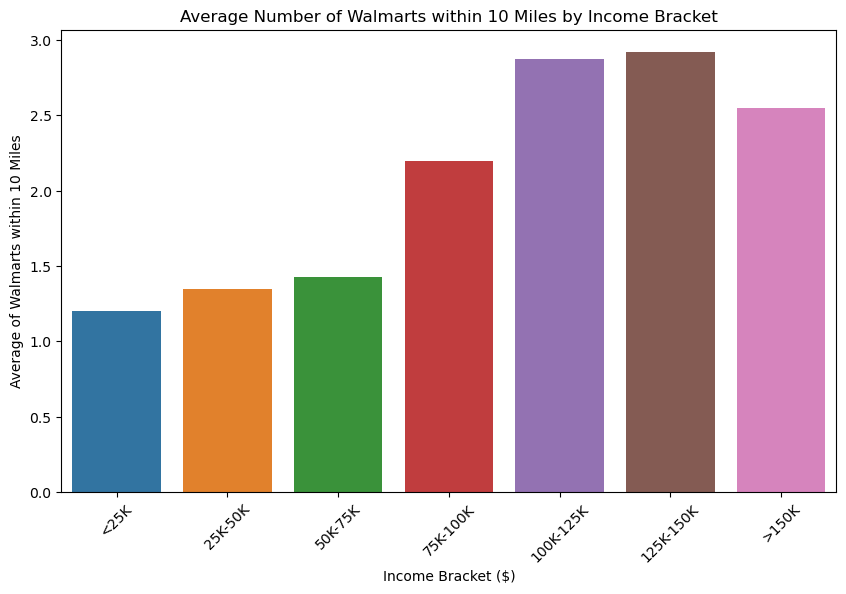

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_zips.csv is loaded and processed as before

# Defining income brackets
income_brackets = [0, 25000, 50000, 75000, 100000, 125000, 150000, np.inf]
labels = ['<25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '>150K']

# Categorizing the data into income brackets
final_zips['income_bracket'] = pd.cut(final_zips['median_household_income'], bins=income_brackets, labels=labels)

# Calculate the average of Walmarts within 10 miles by income bracket (not weighted)
avg_within_10 = final_zips.groupby('income_bracket')['within_10_miles_count'].mean()

# Convert the Series to a DataFrame for plotting
avg_within_10_df = avg_within_10.reset_index()
avg_within_10_df.columns = ['Income Bracket', 'Average of Walmarts within 10 Miles']

# Code for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_within_10_df, x='Income Bracket', y='Average of Walmarts within 10 Miles')
plt.title('Average Number of Walmarts within 10 Miles by Income Bracket')
plt.xlabel('Income Bracket ($)')
plt.ylabel('Average of Walmarts within 10 Miles')
plt.xticks(rotation=45)
plt.show()


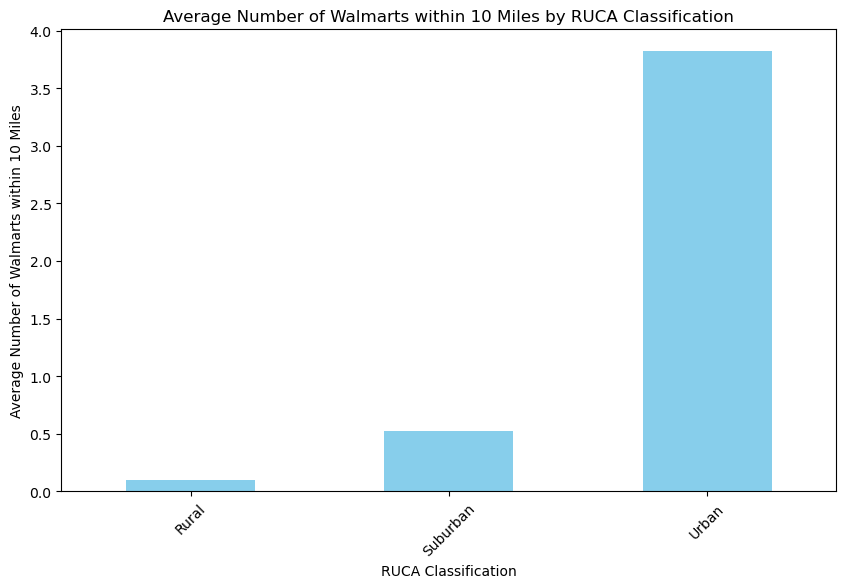

In [25]:
# Group by RUCA and calculate the average number of Walmarts within 10 miles
ruca_avg_walmarts = final_zips.groupby('ruca')['within_10_miles_count'].mean()

# Plotting
ruca_avg_walmarts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Number of Walmarts within 10 Miles by RUCA Classification')
plt.xlabel('RUCA Classification')
plt.ylabel('Average Number of Walmarts within 10 Miles')
plt.xticks(rotation=45)
plt.show()


/var/folders/_6/p9nq2tdd6418xp1vt5dxwqhm0000gn/T/ipykernel_8211/2804378215.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_bin_avg_walmarts = final_zips.groupby('population_bin')['within_10_miles_count'].mean()


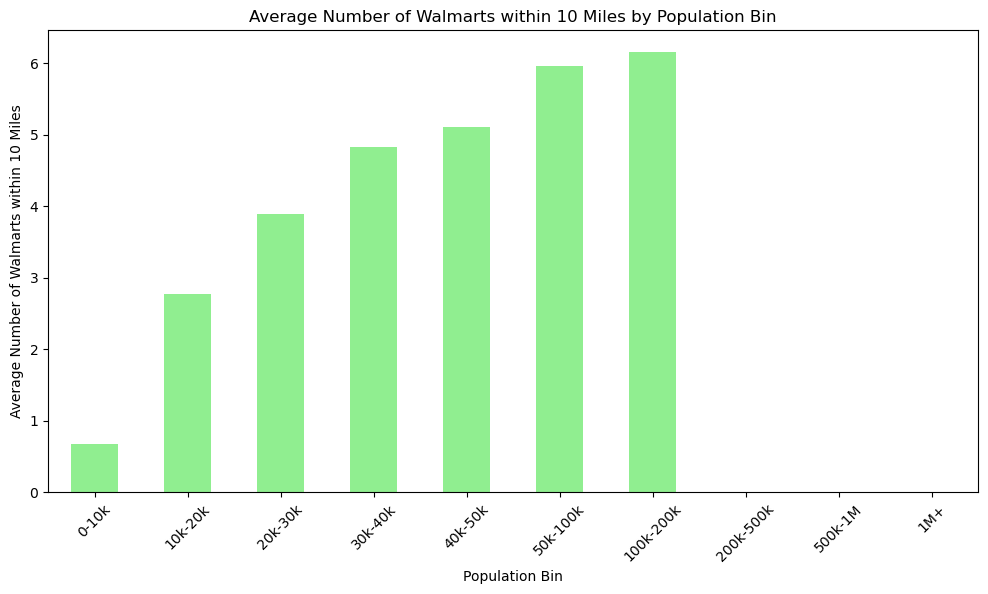

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
final_zips = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/walmart-proximity/data/final/final_zips.csv')

# Ensure the 'population' column is of string type before applying string methods
final_zips['population'] = final_zips['population'].astype(str)

# Convert population to a numeric value (handle commas and missing values)
final_zips['population'] = pd.to_numeric(final_zips['population'].str.replace(',', ''), errors='coerce')

# Define population bins
bins = [0, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 500000, 1000000, np.inf]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M+']

# Create a new column for population bins
final_zips['population_bin'] = pd.cut(final_zips['population'], bins=bins, labels=labels)

# Group by population bin and calculate the average number of Walmarts
pop_bin_avg_walmarts = final_zips.groupby('population_bin')['within_10_miles_count'].mean()

# Plotting
pop_bin_avg_walmarts.plot(kind='bar', color='lightgreen', figsize=(12, 6))
plt.title('Average Number of Walmarts within 10 Miles by Population Bin')
plt.xlabel('Population Bin')
plt.ylabel('Average Number of Walmarts within 10 Miles')
plt.xticks(rotation=45)
plt.show()
